In [1]:
import figure_functions as ff

import pandas as pd
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns

import skimage
from skimage import io
from skimage import color
from skimage import filters

from sklearn.metrics import classification_report, confusion_matrix
import itertools


%matplotlib inline

In [3]:
!mkdir figures

# Custom colorblind friendly palette
colors = ["#D81B60", "#1E88E5", "#FFC107", "#004D40"]
sns.set_palette(sns.color_palette(colors))

df = pd.read_csv('eda_markers.csv')

mkdir: figures: File exists


## How many cells per class?

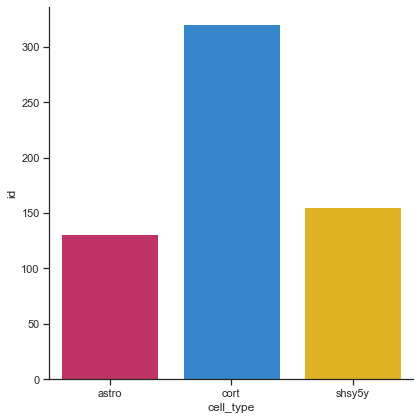

In [4]:
df_uniq = df.drop_duplicates(subset=['id'])
df_uniq = df_uniq[["id","cell_type"]].groupby(["cell_type"]).count().reset_index()


sns.set_theme(style="ticks")
sns.set_palette(sns.color_palette(colors))

g = sns.catplot(data = df_uniq, kind = "bar",
                x = "cell_type", y = "id", height=6)

## Bivariate scatterplots plus example images

**Replace `std_grey_nocell` and `std_grey_cell` in the code below with any of the variables listed below to show a bivariate scatterplot of these variables per cell type as well as the cell images that are closest to the centers of these distributions**.

For some variables, log axes are recommended (see example in the last cell of this notebook)

* min_grey_global
* max_grey_global
* mean_grey_global
* std_grey_global
* min_grey_cell
* max_grey_cell
* mean_grey_cell
* std_grey_cell
* min_grey_nocell
* max_grey_nocell
* mean_grey_nocell
* std_grey_nocell
* n_annotations          
* perc_total_annotation
* perc_single_annotation
* min_perc_single_annotation
* max_perc_single_annotation
* range_perc_single_annotation
* mean_perc_single_annotation

/Users/torbenlaske/neuefische/WHAT-THE-CELL...-AND-WHERE-/notebooks/EDA/figure_functions.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["center_img"] = 0


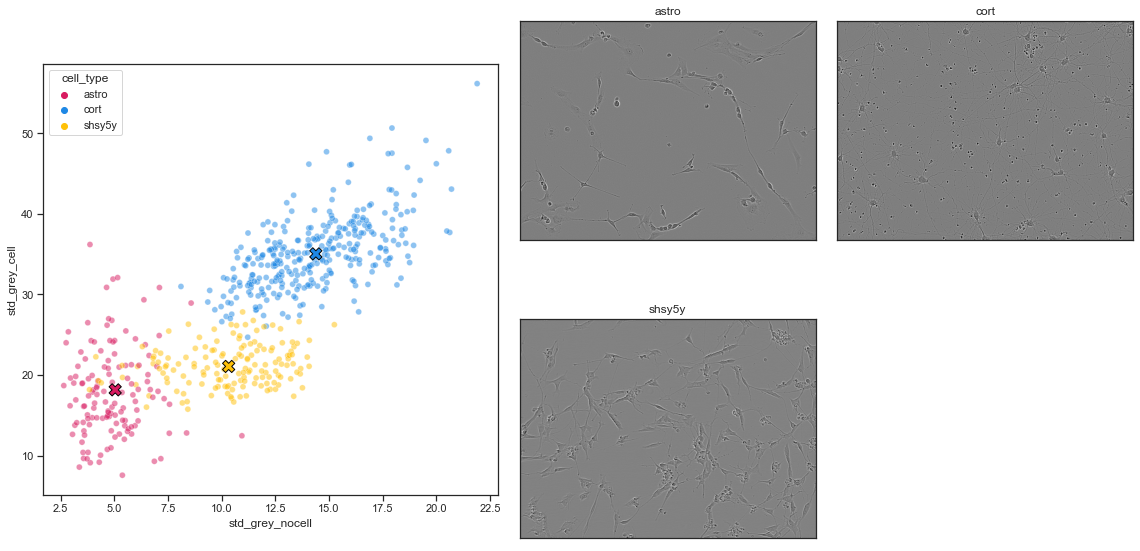

In [5]:
df_uniq = df.drop_duplicates(subset=['id'])

ff.scatterplot_and_img(df_uniq, df_uniq["cell_type"].unique(), "std_grey_nocell", "std_grey_cell")

/Users/torbenlaske/neuefische/WHAT-THE-CELL...-AND-WHERE-/notebooks/EDA/figure_functions.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["center_img"] = 0


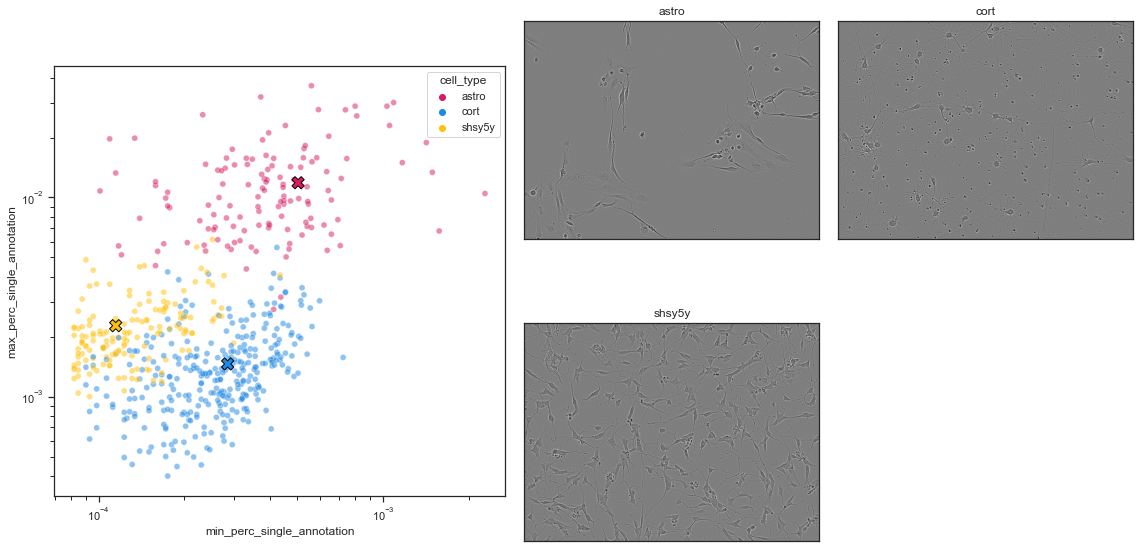

In [6]:
ff.scatterplot_and_img(df_uniq, df_uniq["cell_type"].unique(), "min_perc_single_annotation", "max_perc_single_annotation",
                       log_axes = True)

/Users/torbenlaske/neuefische/WHAT-THE-CELL...-AND-WHERE-/notebooks/EDA/figure_functions.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["center_img"] = 0


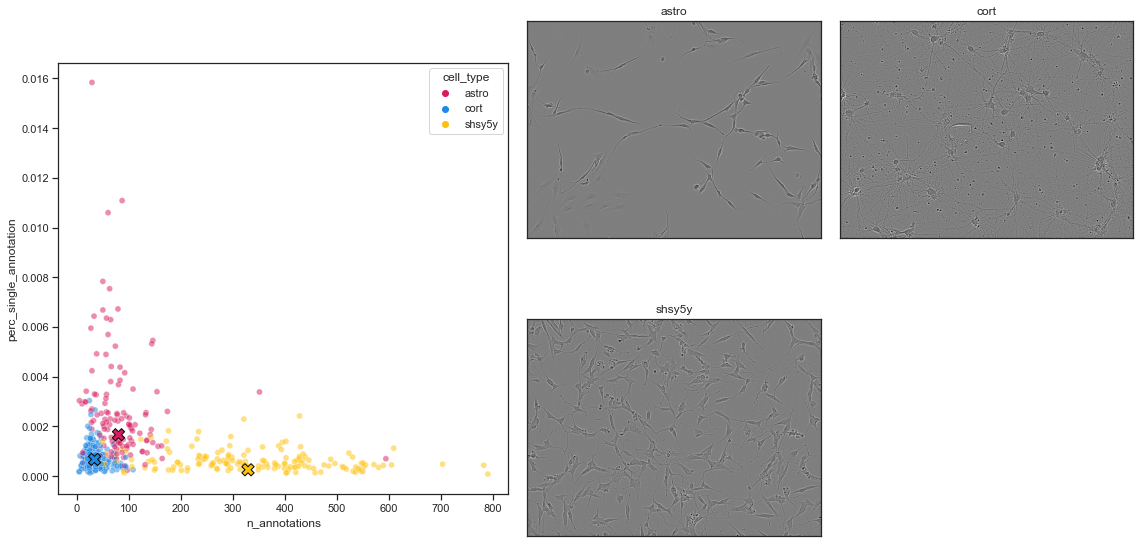

In [7]:
ff.scatterplot_and_img(df_uniq, df_uniq["cell_type"].unique(), "n_annotations", "perc_single_annotation",
                       log_axes = False)

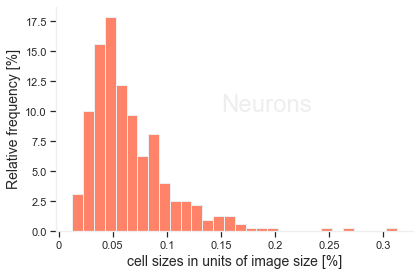

In [8]:
fontcolor = "#EEEEEE"
nf_orange = "#FF5A36"
dfcort = df_uniq.loc[df_uniq['cell_type'] == 'cort']
ax = sns.histplot(x = dfcort.perc_single_annotation, binwidth = 0.0001,
                    edgecolor = fontcolor, color = nf_orange, stat='percent')


plt.rcParams.update({'text.color' : fontcolor,
                     'axes.labelcolor' : fontcolor,
                     'xtick.color' : fontcolor,
                     'ytick.color' : fontcolor})

ax.set_xlabel('cell sizes in units of image size [%]', fontsize=14)
ax.set_ylabel('Relative frequency [%]', fontsize=14)
ax.spines['left'].set_color(fontcolor)
ax.spines['bottom'].set_color(fontcolor) 
ax.text(0.0015, 10, "Neurons", fontsize=24)
ax.set_xticks([0,0.0005,0.001,0.0015, 0.002, 0.0025, 0.003])
ax.set_xticklabels([0,0.05,0.1,0.15, 0.2, 0.25, 0.3])


sns.despine(top = True, right = True)
plt.tight_layout()
plt.savefig("cort.png", dpi=300, transparent=True)

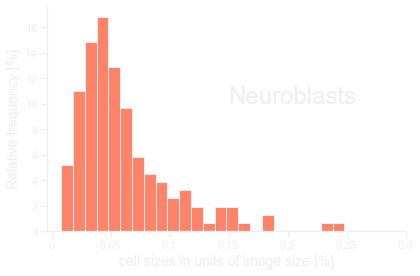

In [9]:
fontcolor = "#EEEEEE"
nf_orange = "#FF5A36"
dfshsy5y = df_uniq.loc[df_uniq['cell_type'] == 'shsy5y']
ax = sns.histplot(x = dfshsy5y.perc_single_annotation, binwidth = 0.0001,
                    edgecolor = fontcolor, color = nf_orange, stat='percent')


plt.rcParams.update({'text.color' : fontcolor,
                     'axes.labelcolor' : fontcolor,
                     'xtick.color' : fontcolor,
                     'ytick.color' : fontcolor})

ax.set_xlabel('cell sizes in units of image size [%]', fontsize=14)
ax.set_ylabel('Relative frequency [%]', fontsize=14)
ax.spines['left'].set_color(fontcolor)
ax.spines['bottom'].set_color(fontcolor) 
ax.text(0.0015, 10, "Neuroblasts", fontsize=24)
ax.set_xticks([0,0.0005,0.001,0.0015, 0.002, 0.0025, 0.003])
ax.set_xticklabels([0,0.05,0.1,0.15, 0.2, 0.25, 0.3])


sns.despine(top = True, right = True)
plt.tight_layout()
plt.savefig("neuroblasts.png", dpi=300, transparent=True)

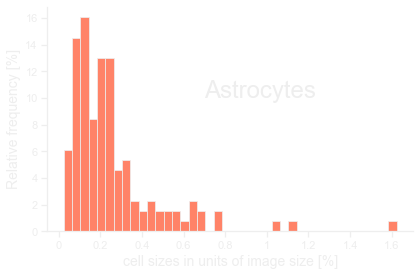

In [10]:
fontcolor = "#EEEEEE"
nf_orange = "#FF5A36"
dfastro = df_uniq.loc[df_uniq['cell_type'] == 'astro']
ax = sns.histplot(x = dfastro.perc_single_annotation, binwidth = 0.0004,
                    edgecolor = fontcolor, color = nf_orange, stat='percent')


plt.rcParams.update({'text.color' : fontcolor,
                     'axes.labelcolor' : fontcolor,
                     'xtick.color' : fontcolor,
                     'ytick.color' : fontcolor})

ax.set_xlabel('cell sizes in units of image size [%]', fontsize=14)
ax.set_ylabel('Relative frequency [%]', fontsize=14)
ax.spines['left'].set_color(fontcolor)
ax.spines['bottom'].set_color(fontcolor) 
ax.text(0.007, 10, "Astrocytes", fontsize=24)
ax.set_xticks([0,0.002,0.004,0.006, 0.008, 0.01, 0.012, 0.014, 0.016])
ax.set_xticklabels([0,0.2,0.4,0.6, 0.8, 1, 1.2, 1.4, 1.6])
#ax. set(xlim=(0, 0.007))


sns.despine(top = True, right = True)
plt.tight_layout()
plt.savefig("astro.png", dpi=300, transparent=True)